In [1]:
import cv2

from utils import *
import warnings
import numpy as np
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

In [4]:
h_theta = np.pi / 180
h_lines = None
h_srn = 0  # divisor for rho
h_stn = 0  # divisor for theta

# Canny
c_t1 = 50
c_t2 = c_t1 * 3

# Process model image=========================
model_img = cv.imread('images/0.jpg')
model_gray = cv.cvtColor(model_img, cv.COLOR_BGR2GRAY)
cv.imwrite("./output/gray-scale.jpg", model_gray)
model_canny = cv.Canny(model_gray, c_t1, c_t2)
cv.imwrite("./output/canny-detected.jpg", model_gray)
model_lines = cv.cvtColor(model_canny, cv.COLOR_GRAY2BGR)
source_lines = cv.HoughLines(model_canny, 1.1, h_theta, 247, h_lines, h_srn, h_stn)

linesP = cv.HoughLinesP(model_canny, 1, np.pi / 180, 50, None, 50, 10)
cdstP = np.copy(cv.cvtColor(model_canny, cv.COLOR_GRAY2BGR))

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)

cv.imwrite("model_hough_lines(cdstP).png", cdstP)

cartesian_lines = []
if source_lines is not None:
    for i in range(0, len(source_lines)):
        pt1, pt2 = add_line(source_lines, i, model_lines)
        cartesian_lines.append([[pt1[0], pt1[1]], [pt2[0], pt2[1]]])
        
# print("cartesian_lines:", cartesian_lines)
all_intersections = junctions(cartesian_lines)
print("all_intersections:", all_intersections)
cluster_centers = kmeans_centers(all_intersections, 10)

mark_all(cluster_centers, model_lines)
cv.imwrite("model_lines.png", model_lines)

# Calculate corners
m_top, m_bot = get_model_corners(cluster_centers)
print("Cluster centers:", cluster_centers)
print("Points on top:", m_top)
print("Points on bot:", m_bot)
model_joined_topbot = m_top + m_bot

all_intersections: [[5, 5], [348, 5], [695, 5], [122, 5], [579, 5], [126, 5], [576, 5], [5, 379], [348, 379], [695, 379], [122, 379], [579, 379], [126, 379], [576, 379], [5, 1], [348, 1], [695, 1], [122, 1], [579, 1], [126, 1], [576, 1]]
Cluster centers: [[124.  379. ]
 [577.5   3. ]
 [124.    3. ]
 [577.5 379. ]
 [348.    3. ]
 [348.  379. ]
 [  5.    3. ]
 [695.    3. ]
 [  5.  379. ]
 [695.  379. ]]
Points on top: [[5, 3], [695, 3]]
Points on bot: [[5, 379], [695, 379]]


# SIFT

In [3]:
img = cv.imread('images/8.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()
kp = sift.detect(gray, None)
kpl=[]
for i in range(10):
    kpl.append(kp[i])

kp = tuple(kpl)
print(kp)



img=cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img=cv.drawKeypoints(gray,kp,img)
cv.imwrite('sift_keypoints.jpg', img)

print(cv.KeyPoint.convert(kp))

(< cv2.KeyPoint 0x7fc576b241e0>, < cv2.KeyPoint 0x7fc576b24840>, < cv2.KeyPoint 0x7fc576b24780>, < cv2.KeyPoint 0x7fc576b24810>, < cv2.KeyPoint 0x7fc576b24ba0>, < cv2.KeyPoint 0x7fc577494db0>, < cv2.KeyPoint 0x7fc5774971b0>, < cv2.KeyPoint 0x7fc5774fb990>, < cv2.KeyPoint 0x7fc5774fbb40>, < cv2.KeyPoint 0x7fc5774f96e0>)
[[ 94.438774  99.061264]
 [105.78287  175.88043 ]
 [109.73017  175.59158 ]
 [109.73017  175.59158 ]
 [109.805046 175.65088 ]
 [109.805046 175.65088 ]
 [115.271286 176.95506 ]
 [117.051    177.29468 ]
 [117.57627  182.19208 ]
 [122.10528  186.54015 ]]


# HARRIS

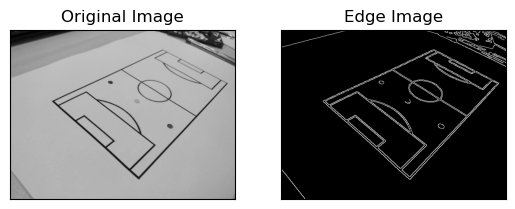

In [4]:
filename = './images/8.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv.cornerHarris(gray, 2, 3, 0.04)

# result is dilated for marking the corners, not important
dst = cv.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst > 0.01 * dst.max()] = [0, 0, 255]
cv.imwrite('harris_keypoints.jpg', img)

img = cv.imread('./images/8.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img, 100, 200)

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [5]:
model_img = cv.imread('images/8.jpg')
model_gray = cv.cvtColor(model_img, cv.COLOR_BGR2GRAY)
model_canny = cv.Canny(model_gray, c_t1, c_t2)
model_lines = cv.cvtColor(model_canny, cv.COLOR_GRAY2BGR)
cv.imwrite("canny-gray.jpg", model_lines)
# get_frame_corners(source_lines)

True

In [ ]:
src = cv.imread("./images/8.jpg")
dst = cv.Canny(src, 50, 200, None, 3)

# Copy edges to the images that will display the results in BGR
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)

lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(cdst, pt1, pt2, (0,0,255), 3, cv2.LINE_8)


linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)

cv.imshow("Standard Hough Line Transform", cdst)
cv.imshow("Probabilistic Line Transform", cdstP)

cv.waitKey()

QObject::moveToThread: Current thread (0x1852530) is not the object's thread (0x310a060).
Cannot move to target thread (0x1852530)

QObject::moveToThread: Current thread (0x1852530) is not the object's thread (0x310a060).
Cannot move to target thread (0x1852530)

Qt: Session management error: Could not open network socket
QObject::moveToThread: Current thread (0x1852530) is not the object's thread (0x310a060).
Cannot move to target thread (0x1852530)

QObject::moveToThread: Current thread (0x1852530) is not the object's thread (0x310a060).
Cannot move to target thread (0x1852530)

QObject::moveToThread: Current thread (0x1852530) is not the object's thread (0x310a060).
Cannot move to target thread (0x1852530)

QObject::moveToThread: Current thread (0x1852530) is not the object's thread (0x310a060).
Cannot move to target thread (0x1852530)

QObject::moveToThread: Current thread (0x1852530) is not the object's thread (0x310a060).
Cannot move to target thread (0x1852530)

QObject::moveToT

In [ ]:
img = cv.imread('./images/8.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img, 100, 200)

img = cv.imread('images/8.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()
keypoints = sift.detect(gray, None)



src = cv.imread("./images/8.jpg")
dst = cv.Canny(src, 50, 200, None, 3)
linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)
# 
for line in linesP:
    print(line)

# for i in range(0, len(linesP)):
#     l = linesP[i][0]
#     point1_x=l[0]
#     point1_y=l[1]
#     point2_x=l[2]
#     point2_y=l[3]
#     print(l)

# if linesP is not None:
#     for i in range(0, len(linesP)):
#         l = linesP[i][0]
#         point1_x=l[0]
#         point1_y=l[1]
#         point2_x=l[2]
#         point2_y=l[3]
#         
#         # Assuming 'edges' is a binary image with edges (255 for edges, 0 otherwise)
#         edges_binary = edges > 0
#         
#         # Get the coordinates of the key points
#         kp_coordinates = np.array([k.pt for k in kp])
#         
#         # Check if the key points are located on the edges
#         kp_on_edges = edges_binary[kp_coordinates[:, 1].astype(int), kp_coordinates[:, 0].astype(int)]
#         print(kp_on_edges)
        
